In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

DATADIR = "image_classification/train"

CATEGORIES = ["car", "bike"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        print(os.path.join(path,img))
        
        
        
#         img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
#         plt.imshow(img_array, cmap='gray')  # graph it
#         plt.show()  # display!

#           # we just want one for now so break
#       #...and one more!

image_classification/train\car\00001.jpg
image_classification/train\car\00002.jpg
image_classification/train\car\00003.jpg
image_classification/train\car\00004.jpg
image_classification/train\car\00005.jpg
image_classification/train\car\00006.jpg
image_classification/train\car\00007.jpg
image_classification/train\car\00008.jpg
image_classification/train\car\00009.jpg
image_classification/train\car\00010.jpg
image_classification/train\car\00011.jpg
image_classification/train\car\00012.jpg
image_classification/train\car\00013.jpg
image_classification/train\car\00014.jpg
image_classification/train\car\00015.jpg
image_classification/train\car\00016.jpg
image_classification/train\car\00017.jpg
image_classification/train\car\00018.jpg
image_classification/train\car\00019.jpg
image_classification/train\car\00020.jpg
image_classification/train\car\00021.jpg
image_classification/train\car\00022.jpg
image_classification/train\car\00023.jpg
image_classification/train\car\00024.jpg
image_classifica

In [19]:
batch_size = 32
img_height = 180
img_width = 180

In [20]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 96 files belonging to 2 classes.
Using 77 files for training.


In [21]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 96 files belonging to 2 classes.
Using 19 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names)

['bike', 'car']


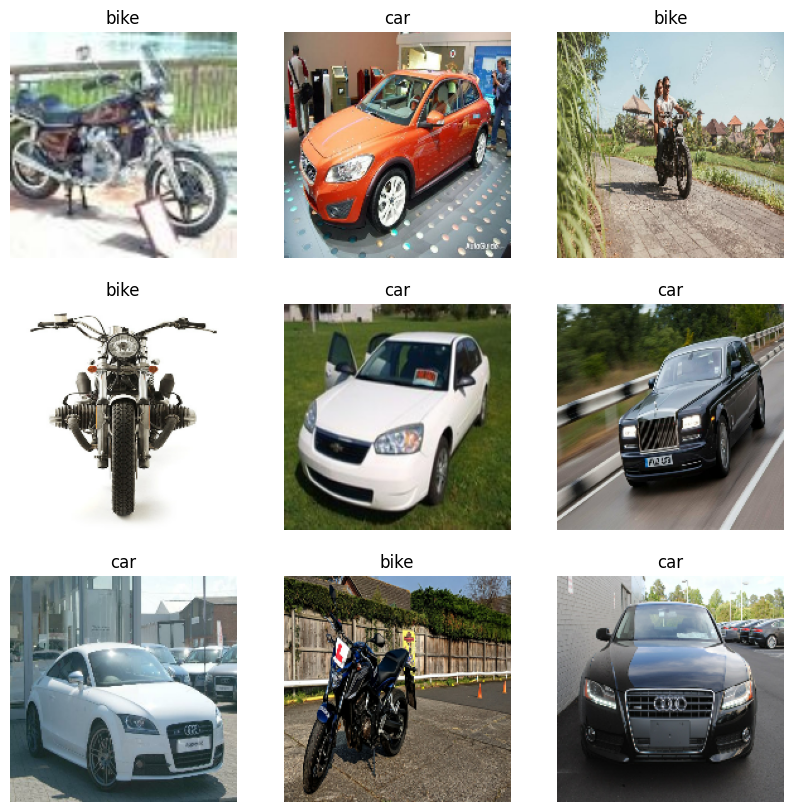

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
normalization_layer = layers.Rescaling(1./255)

In [26]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.00392198 1.0


In [27]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [30]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 6s 932ms/step - loss: 1.3888 - accuracy: 0.5455 - val_loss: 0.9530 - val_accuracy: 0.6842
Epoch 2/10
3/3 [==============================] - 1s 424ms/step - loss: 1.4769 - accuracy: 0.4545 - val_loss: 0.6845 - val_accuracy: 0.4737
Epoch 3/10
3/3 [==============================] - 1s 434ms/step - loss: 0.5814 - accuracy: 0.6494 - val_loss: 0.8274 - val_accuracy: 0.3684
Epoch 4/10
3/3 [==============================] - 1s 447ms/step - loss: 0.5263 - accuracy: 0.7792 - val_loss: 0.5764 - val_accuracy: 0.7895
Epoch 5/10
3/3 [==============================] - 1s 607ms/step - loss: 0.4227 - accuracy: 0.9351 - val_loss: 0.7057 - val_accuracy: 0.5789
Epoch 6/10
3/3 [==============================] - 1s 559ms/step - loss: 0.3519 - accuracy: 0.9091 - val_loss: 0.5840 - val_accuracy: 0.7895
Epoch 7/10
3/3 [==============================] - 1s 440ms/step - loss: 0.2809 - accuracy: 0.9221 - val_loss: 0.7484 - val_accuracy: 0.6842
Epoch 8/10
3/3 [====

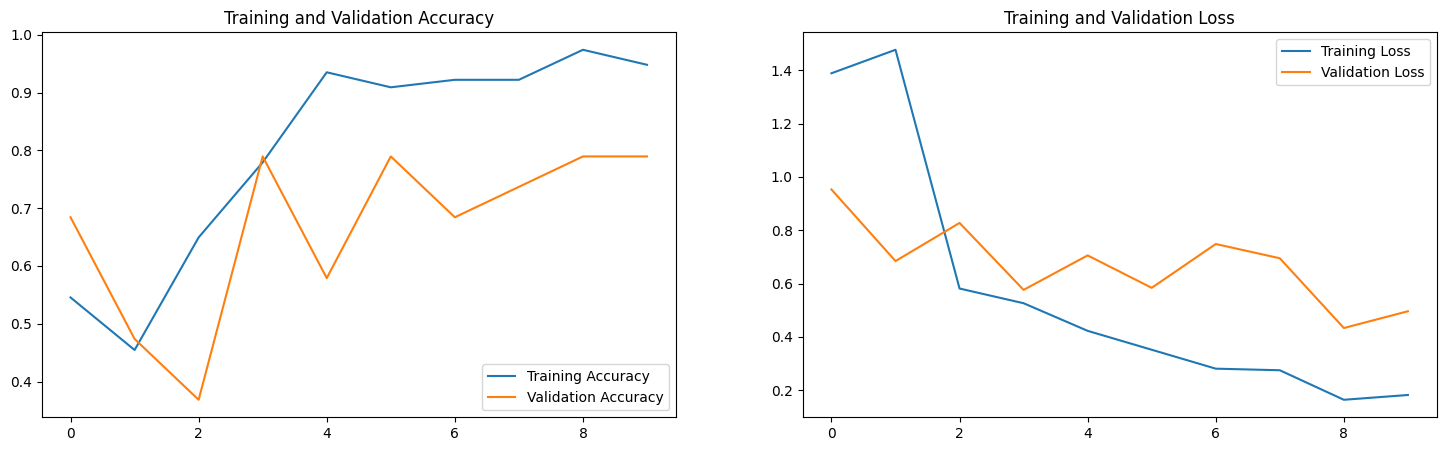

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

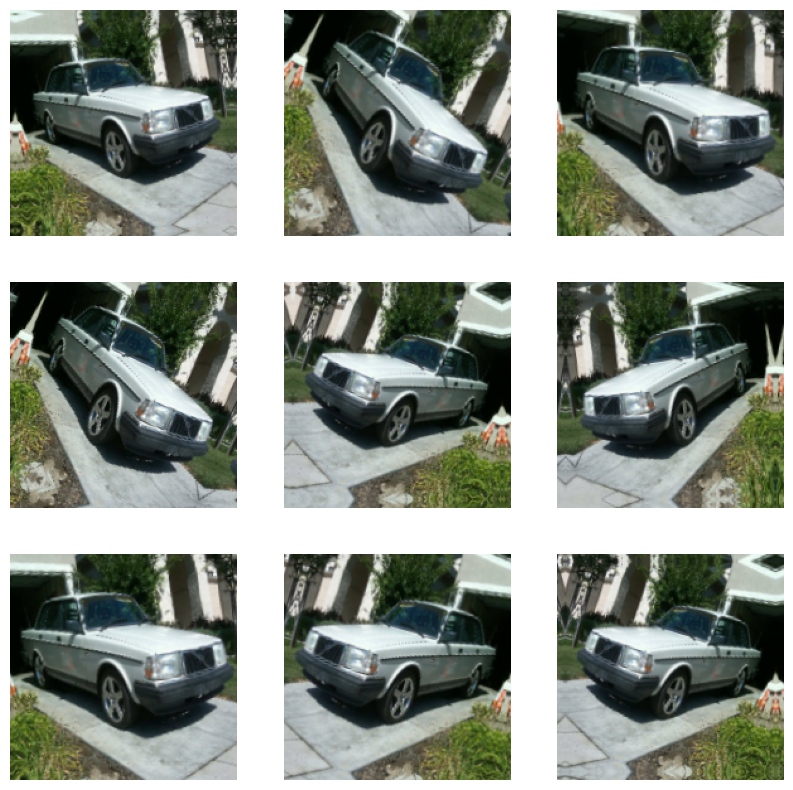

In [39]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [40]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [43]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
3/3 [==============================] - 9s 729ms/step - loss: 0.8292 - accuracy: 0.5584 - val_loss: 0.5808 - val_accuracy: 0.6842
Epoch 2/15
3/3 [==============================] - 2s 521ms/step - loss: 0.7393 - accuracy: 0.5325 - val_loss: 0.8371 - val_accuracy: 0.3158
Epoch 3/15
3/3 [==============================] - 2s 703ms/step - loss: 0.6666 - accuracy: 0.6104 - val_loss: 0.6124 - val_accuracy: 0.8421
Epoch 4/15
3/3 [==============================] - 2s 522ms/step - loss: 0.6219 - accuracy: 0.8442 - val_loss: 0.5701 - val_accuracy: 0.7895
Epoch 5/15
3/3 [==============================] - 2s 524ms/step - loss: 0.5423 - accuracy: 0.8442 - val_loss: 0.4700 - val_accuracy: 0.7895
Epoch 6/15
3/3 [==============================] - 2s 690ms/step - loss: 0.4545 - accuracy: 0.8701 - val_loss: 0.6880 - val_accuracy: 0.5789
Epoch 7/15
3/3 [==============================] - 2s 546ms/step - loss: 0.4006 - accuracy: 0.7792 - val_loss: 0.4207 - val_accuracy: 0.8421
Epoch 8/15
3/3 [====

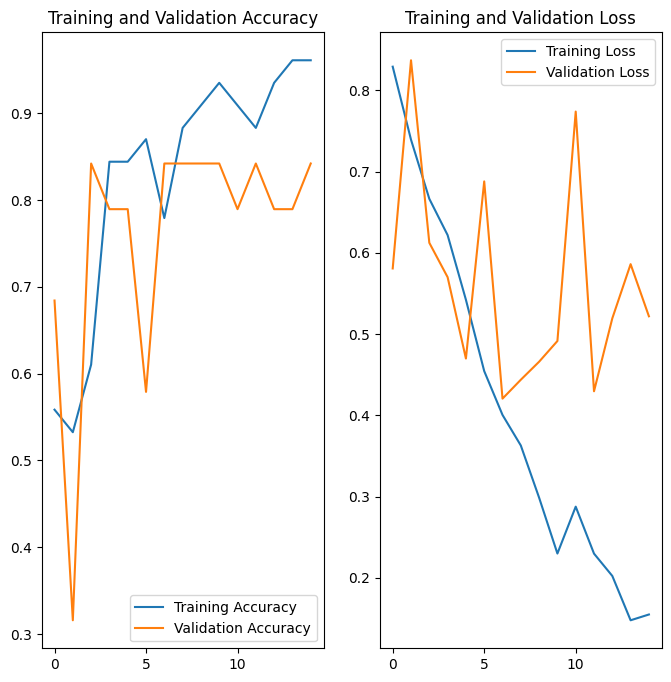

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 312ms/step
car 82.88978338241577


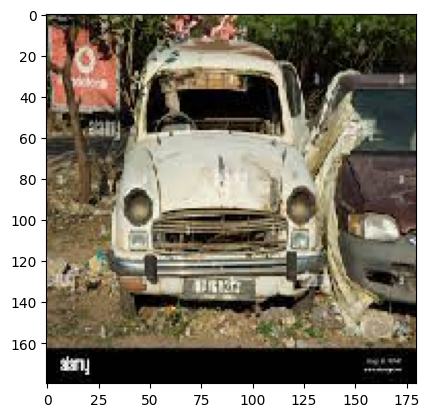

In [45]:
data = "image_classification/train/images (5).jpg"

img = tf.keras.utils.load_img(
    data, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)], 100 * np.max(score))

plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 52ms/step
car 99.98558759689331


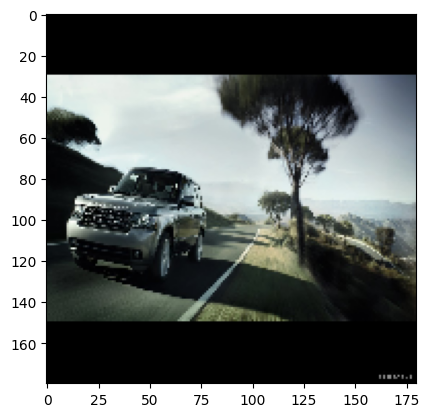

In [58]:
data = "image_classification/train/car/00031.jpg"

img = tf.keras.utils.load_img(
    data, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)], 100 * np.max(score))







# img = image.load_img(sunflower_path, target_size=(100, 100))

plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 53ms/step
car 99.405437707901


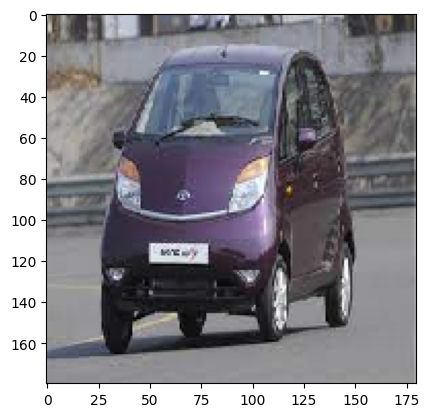

In [48]:
data = "images.jpg"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)], 100 * np.max(score))

plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 56ms/step
bike 97.00447916984558


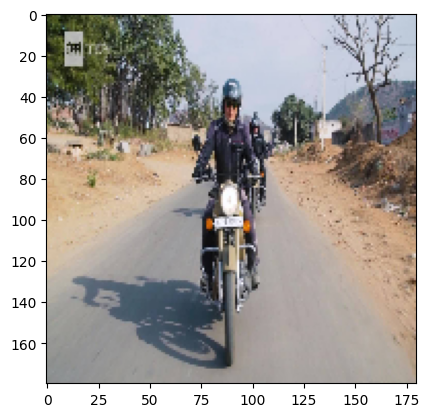

In [51]:
data = "190503110854-india-vintage-motorbike-tour-vision-00000714.jpg"

img = tf.keras.utils.load_img(
    data, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)], 100 * np.max(score))

plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 55ms/step
bike 99.97101426124573


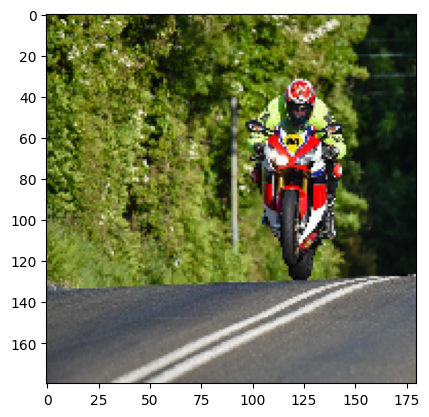

In [53]:
data = "flying-marshal.jpg"

img = tf.keras.utils.load_img(
    data, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)], 100 * np.max(score))

plt.imshow(img)
plt.show()